<a href="https://colab.research.google.com/github/Heshmitha/Rock-vs-mine-prediction/blob/main/Rock_vs_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the necessary libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection And Preprocessing

In [ ]:
#loding the dataset using pandas
df=pd.read_csv("/content/sonar data.csv",header=None)

In [ ]:
df.shape

(208, 61)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [ ]:
df.describe() #describes statistical measures

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df[60].value_counts()

,count
60,
M,111
R,97


Split

x=independent variables

y=dependent variable

In [ ]:
x=df.drop(columns=60,axis=1)

In [ ]:
y=df[60]

In [ ]:
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Split Train And Test Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(x_train)
print(y_train)

         0       1       2       3       4       5       6       7       8   \
113  0.0283  0.0599  0.0656  0.0229  0.0839  0.1673  0.1154  0.1098  0.1370   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
116  0.0094  0.0333  0.0306  0.0376  0.1296  0.1795  0.1909  0.1692  0.1870   
171  0.0179  0.0136  0.0408  0.0633  0.0596  0.0808  0.2090  0.3465  0.5276   
64   0.0071  0.0103  0.0135  0.0494  0.0253  0.0806  0.0701  0.0738  0.0117   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
85   0.0365  0.1632  0.1636  0.1421  0.1130  0.1306  0.2112  0.2268  0.2992   
132  0.0968  0.0821  0.0629  0.0608  0.0617  0.1207  0.0944  0.4223  0.5744   
164  0.0163  0.0198  0.0202  0.0386  0.0752  0.1444  0.1487  0.1484  0.2442   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   

         9   ...      50      51      52      53   

Model Training

In [ ]:
model=LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_train_prdiction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prdiction,y_train)

In [ ]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.8181818181818182


In [ ]:
x_test_prdiction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prdiction,y_test)

In [ ]:
print("Accuracy on testing data:",testing_data_accuracy)

Accuracy on testing data: 0.9047619047619048


making a predictive system

In [ ]:
input_data=(0.0207,0.0535,0.0334,0.0818,0.0740,0.0324,0.0918,0.1070,0.1553,0.1234,0.1796,0.1787,0.1247,0.2577,0.3370,0.3990,0.1647,0.2266,0.3219,0.5356,0.8159,1.0000,0.8701,0.6889,0.6299,0.5738,0.5707,0.5976,0.4301,0.2058,0.1000,0.2247,0.2308,0.3977,0.3317,0.1726,0.1429,0.2168,0.1967,0.2140,0.3674,0.2023,0.0778,0.0925,0.2388,0.3400,0.2594,0.1102,0.0911,0.0462,0.0171,0.0033,0.0050,0.0190,0.0103,0.0121,0.0042,0.0090,0.0070,0.0099)

#changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

['M']


In [ ]:
if(prediction[0]=='R'):
  print("The object is a Rock")
else:
  print("The object is a Mine")


The object is a Mine


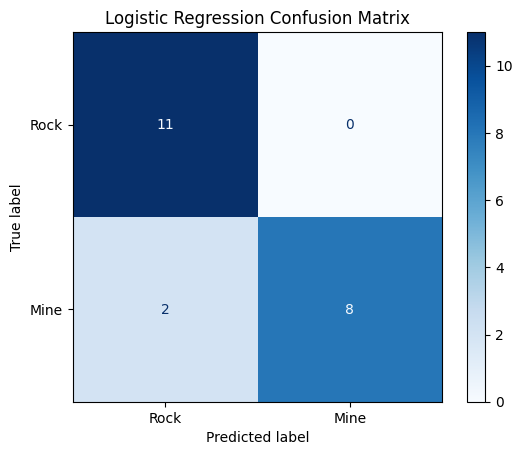

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix

cm = confusion_matrix(y_test,x_test_prdiction )

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rock', 'Mine'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(max_depth=5,min_samples_split=10,random_state=2)
model1.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=2)

In [ ]:
x_train_prdiction1=model1.predict(x_train)
training_data_accuracy1=accuracy_score(x_train_prdiction1,y_train)

In [ ]:
print("Accuracy:",training_data_accuracy1)

Accuracy: 0.9679144385026738


In [ ]:
x_test_prdiction1=model1.predict(x_test)
testing_data_accuracy1=accuracy_score(x_test_prdiction1,y_test)

In [ ]:
print("Accurracy:",testing_data_accuracy1)

Accurracy: 0.6666666666666666


In [ ]:
input_data=(0.0202,0.0104,0.0325,0.0239,0.0807,0.1529,0.1154,0.0608,0.1317,0.1370,0.0843,0.0269,0.1254,0.3046,0.5584,0.7973,0.8341,0.8057,0.8616,0.8769,0.9413,0.9403,0.9409,1.0000,0.9725,0.9309,0.9351,0.7317,0.4421,0.3244,0.4161,0.4611,0.4031,0.3000,0.2459,0.1348,0.2541,0.2255,0.1598,0.1485,0.0845,0.0569,0.0855,0.1262,0.1153,0.0570,0.0426,0.0425,0.0235,0.0006,0.0188,0.0127,0.0081,0.0067,0.0043,0.0065,0.0049,0.0054,0.0073,0.0054)

#changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

['R']


In [ ]:
if(prediction[0]=='R'):
  print("The object is a Rock")
else:
  print("The object is a Mine")


The object is a Rock


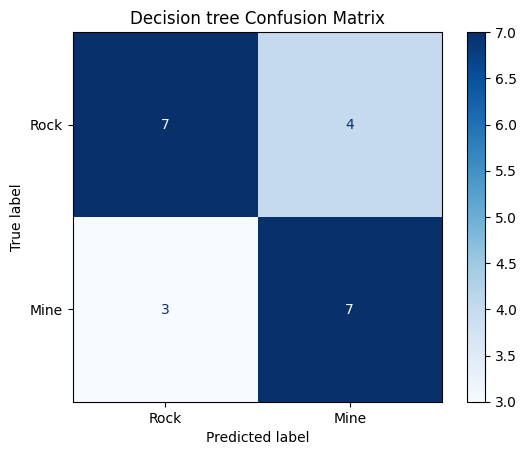

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix

cm = confusion_matrix(y_test,x_test_prdiction1 )

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rock', 'Mine'])
disp.plot(cmap='Blues')
plt.title('Decision tree Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
model2=SVC(kernel='linear',C=1)
model2.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
x_train_prdiction2=model2.predict(x_train)
training_data_accuracy2=accuracy_score(x_train_prdiction1,y_train)

In [ ]:
print("Accuracy:",training_data_accuracy2)

Accuracy: 0.9679144385026738


In [ ]:
x_test_prdiction2=model2.predict(x_test)
testing_data_accuracy2=accuracy_score(x_test_prdiction2,y_test)

In [ ]:
print("Accurracy:",testing_data_accuracy2)

Accurracy: 0.8095238095238095


In [ ]:
input_data=(0.1021,0.0830,0.0577,0.0627,0.0635,0.1328,0.0988,0.1787,0.1199,0.1369,0.2509,0.2631,0.2796,0.2977,0.3823,0.3129,0.3956,0.2093,0.3218,0.3345,0.3184,0.2887,0.3610,0.2566,0.4106,0.4591,0.4722,0.7278,0.7591,0.6579,0.7514,0.6666,0.4903,0.5962,0.6552,0.4014,0.1188,0.3245,0.3107,0.1354,0.5109,0.7988,0.7517,0.5508,0.5858,0.7292,0.5522,0.3339,0.1608,0.0475,0.1004,0.0709,0.0317,0.0309,0.0252,0.0087,0.0177,0.0214,0.0227,0.0106)
#changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

['M']


In [ ]:
if(prediction[0]=='R'):
  print("The object is a Rock")
else:
  print("The object is a Mine")


The object is a Mine


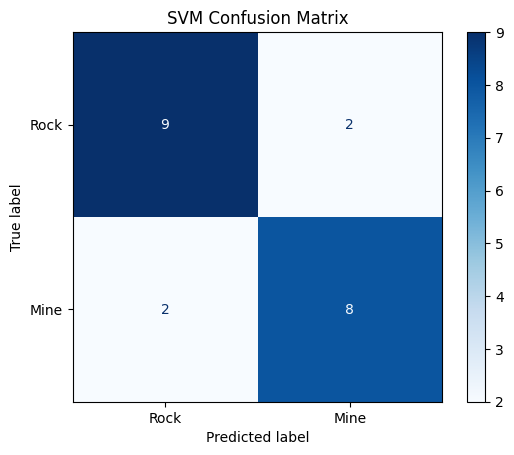

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix

cm = confusion_matrix(y_test,x_test_prdiction2 )

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rock', 'Mine'])
disp.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=2)

In [ ]:
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=2)

In [ ]:
x_tain_prediction3=model3.predict(x_train)
training_data_accuracy3=accuracy_score(x_tain_prediction3,y_train)

In [ ]:
print("Accuracy:",training_data_accuracy3)

Accuracy: 1.0


In [ ]:
x_test_prediction3=model3.predict(x_test)
testing_data_accuracy3=accuracy_score(x_test_prediction3,y_test)

In [ ]:
print("Accuracy:",testing_data_accuracy3)

Accuracy: 0.9523809523809523


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model3,x,y,cv=5)
print("cross validation score:",score)

cross validation score: [0.5        0.71428571 0.71428571 0.75609756 0.68292683]


In [ ]:
input_data=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
#changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)


['R']


In [ ]:
if(prediction[0]=='R'):
  print("The object is a Rock")
else:
  print("The object is a Mine")


The object is a Rock


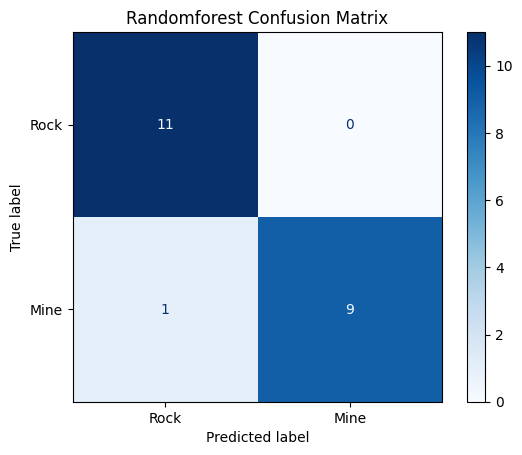

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix

cm = confusion_matrix(y_test,x_test_prediction3 )

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rock', 'Mine'])
disp.plot(cmap='Blues')
plt.title('Randomforest Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
models=['Logistic Regression','Decision Tree',]
accuracy=[testing_data_accuracy,testing_data_accuracy1]

<ipython-input-112-13d14002427c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models,y=accuracy,palette='rocket')


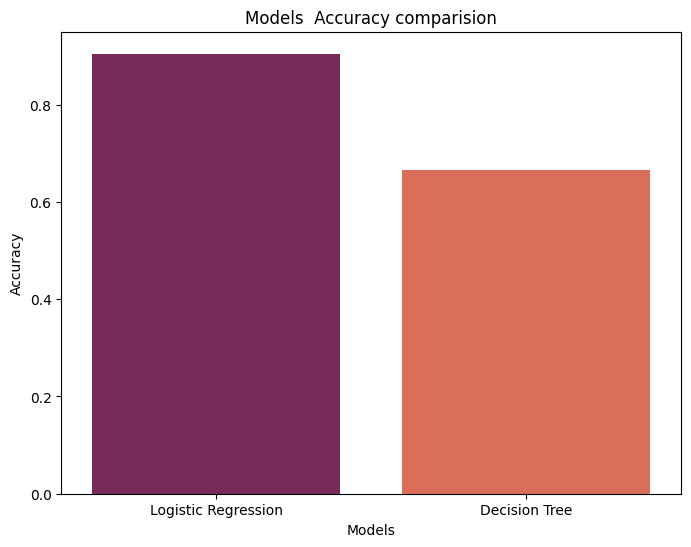

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=models,y=accuracy,palette='rocket')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models  Accuracy comparision')
plt.show()

In [ ]:
models=['Logistic Regression','SVM']
accuracy=[testing_data_accuracy,testing_data_accuracy2]

<ipython-input-114-13d14002427c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models,y=accuracy,palette='rocket')


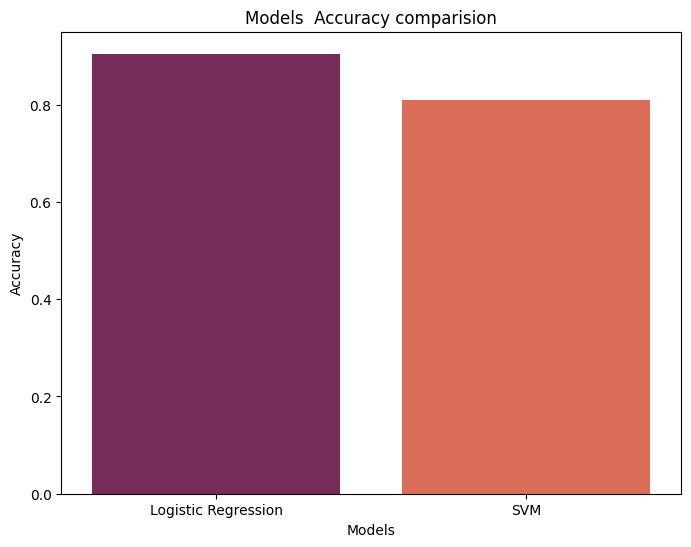

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=models,y=accuracy,palette='rocket')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models  Accuracy comparision')
plt.show()

In [ ]:
models=['Logistic Regression','Random Forest']
accuracy=[testing_data_accuracy,testing_data_accuracy3]

<ipython-input-116-13d14002427c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models,y=accuracy,palette='rocket')


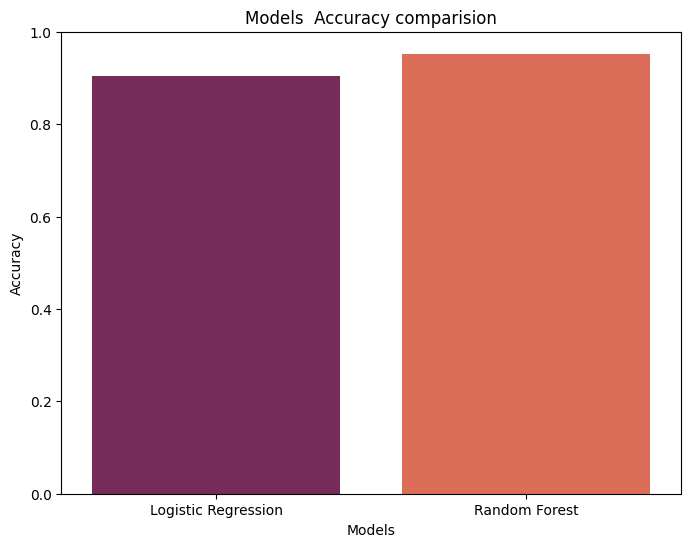

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=models,y=accuracy,palette='rocket')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models  Accuracy comparision')
plt.show()

In [ ]:
models=['Logistic Regression','Decision Tree','SVM','Random Forest']
accuracy=[testing_data_accuracy,testing_data_accuracy1,testing_data_accuracy2,testing_data_accuracy3]

<ipython-input-118-13d14002427c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models,y=accuracy,palette='rocket')


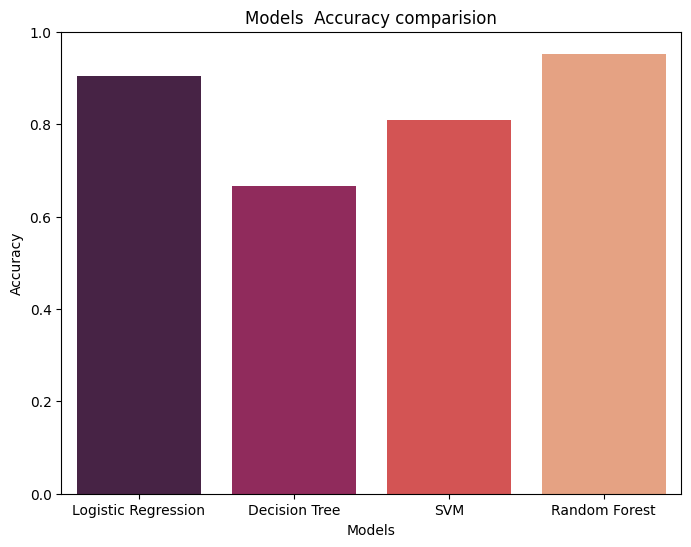

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=models,y=accuracy,palette='rocket')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models  Accuracy comparision')
plt.show()